# Microéconomie 5

Toulouse School of Economics </br>
Cours de microéconomie L3, Isabelle Dubec & David Alary </br>
Solutions des TD : Antoine Jacquet, https://antoine-jacquet.github.io

## TD4 : Externalités

### Exercice 1 : La taxe pigovienne

Les dotations initiales sont $\omega^A = (10, 2)$ et $\omega^B = (2, 10)$. Les agents ont les préférences
\begin{aligned}
    U^A(x^A, x_1^B) &= \ln(1 + x_1^A) + x_2^A - \frac{\ln(1+x_1^B)}{2} \\
    U^B(x^B) &= \ln(1 + x_1^B) + x_2^B.
\end{aligned}


*Définissons ces données du problème, et représentons la carte d'indifférence à titre d'illustration. Notons que $A$ considère l'externalité comme donnée.*

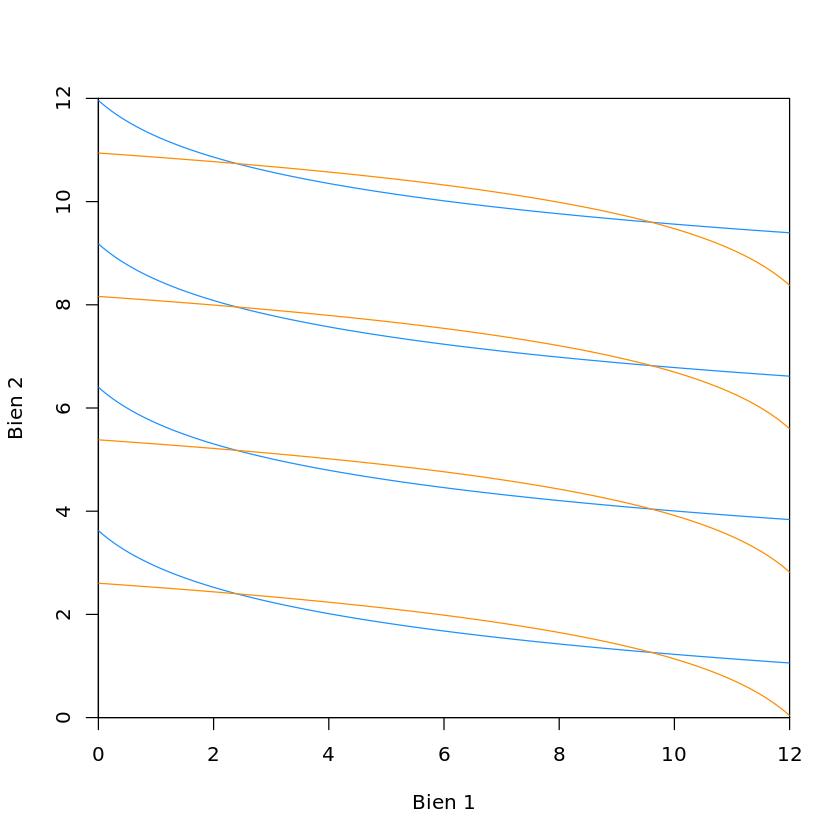

In [1]:
ωA <- c(10, 2)                                             # dotation initiale de A
ωB <- c(2, 10)                                             # dotation initiale de B
ω1 <- ωA[1] + ωB[1]                                        # dotation totale en bien 1
ω2 <- ωA[2] + ωB[2]                                        # dotation totale en bien 2
UA <- function(x1, x2, y1) log(1+x1) + x2 - log(1+y1)/2    # fonction d'utilité de A
UB <- function(x1, x2) log(1+x1) + x2                      # fonction d'utilité de B

x1 <- seq(0, ω1, length=1000)

indiffA <- function(U) U - log(1+x1)
indiffB <- function(U) U - log(1+x1)

niveauxA <- seq(UA(ω1/5, ω2/5, 0), UA(4*ω1/5, 4*ω2/5, 0), len = 4)
niveauxB <- seq(UB(ω1/5, ω2/5), UB(4*ω1/5, 4*ω2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, ω2))
for (U in niveauxB) lines(ω1 - x1, ω2 - indiffB(U), col = "darkorange", ylim = c(0, ω2))


#### Question 1.

Clairement $B$ exerce une externalité *négative* sur $A$ par sa consommation de bien 1. (L'utilité de $A$ décroît quand $x_1^B$ augmente.)


#### Question 2.

Le *dommage marginal* en terme de bien 2 est donné par

\begin{equation}
    \frac{ \partial U^A / \partial x_1^B }{ \partial U^A / \partial x_2^A } = \frac{ - \frac{1}{2(1 + x_1^B)} }{1} = - \frac{1}{2(1 + x_1^B)}.
\end{equation}

Plus $B$ consomme de bien 1, plus le dommage *marginal* est faible.

#### Question 3.

On cherche maintenant l'équilibre concurrentiel de cette économie.


**1. Fonctions de demande**

Soit $p = (p_1, p_2)$ un vecteur de prix donné.

L'agent $A$ résout le programme

\begin{equation}
    \max_{x^A} \; U^A(x^A, x_1^B) \qquad \text{s.c.} \; p \cdot x^A \leq p \cdot \omega^A
\end{equation}

où $x_1^B$ est considéré fixe ($A$ ne considère pas qu'il peut affecter $x_1^B$ en changeant sa propre consommation $x_1^A$). Le lagrangien associé est

\begin{equation}
    \mathcal L(x^A, \mu) = \ln(1 + x_1^A) + x_2^A - \frac{\ln(1+x_1^B)}{2} + \mu(p \cdot \omega^A - p \cdot x^A)
\end{equation}

et les conditions du premier ordre
\begin{aligned}
    &\frac{1}{1 + x_1^A} - \mu p_1 = 0 \\
    &1 - \mu p_2 = 0 \\
    &p \cdot x^A = p \cdot \omega^A.
\end{aligned}

On en déduit
\begin{equation}
    \underbrace{\frac{1}{1 + x_1^A}}_{= \mathsf{TMS}^A} = \frac{p_1}{p_2} \iff x_1^A = \frac{p_2}{p_1} - 1
\end{equation}

qui est valide tant que $p_1 \leq p_2$. Si au contraire $p_1 > p_2$ on aura alors $x_1^A = 0$. La demande en bien 2 s'obtient ensuite par $x_2^A = \frac{p \cdot \omega^A - p_1 x_1^A}{p_2}$.

Les demandes de $A$ sont donc 

\begin{equation}
    \boxed{ x_1^A(p) = \begin{cases}
        \frac{p_2}{p_1} - 1 &\text{si } p_1 \leq p_2 \\
        0 &\text{si } p_1 > p_2
        \end{cases} }
    \quad \text{et} \quad
    \boxed{ x_2^A(p) = \begin{cases}
        \frac{p_1}{p_2} (\omega_1^A + 1) + \omega_2^A - 1 &\text{si } p_2 \leq p_2 \\
        \frac{p_1}{p_2} \omega_1^A + \omega_2^A &\text{si } p_1 > p_2
        \end{cases} }.
\end{equation}


Pour $B$, on trouve les mêmes demandes (c'est normal puisque $A$ et $B$ ont les mêmes préférences si on ne tient pas compte de l'externalité) :

\begin{equation}
    \boxed{ x_1^B(p) = \begin{cases}
        \frac{p_2}{p_1} - 1 &\text{si } p_1 \leq p_2 \\
        0 &\text{si } p_1 > p_2
        \end{cases} }
    \quad \text{et} \quad
    \boxed{ x_2^B(p) = \begin{cases}
        \frac{p_1}{p_2} (\omega_1^B + 1) + \omega_2^B - 1 &\text{si } p_2 \leq p_2 \\
        \frac{p_1}{p_2} \omega_1^B + \omega_2^B &\text{si } p_1 > p_2
        \end{cases} }.
\end{equation}


**2. Équilibre du marché de bien 1**

À l'équilibre concurrentiel le marché du bien 1 doit être équilibré : $x_1^A(p) + x_1^B(p) = \omega_1$. Les demandes prennent des formes différentes selon les valeurs de $p_1$ et $p_2$, donc il faut distinguer les cas. 


**Cas 1.** Si $p_1 \leq p_2$, alors l'équilibre du marché du bien 1 s'écrit
\begin{equation}
    \frac{p_2}{p_1} - 1 + \frac{p_2}{p_1} - 1 = \omega_1 \iff \frac{p_1}{p_2} = \frac{1}{1 + \frac{\omega_1}{2}}.
\end{equation}

Ce rapport de prix constitue un équilibre tant qu'il est cohérent avec l'hypothèse du début du paragraphe, $p_1 \leq p_2$. Mais c'est bien le cas pour le rapport de prix trouvé puisque

\begin{equation}
    \frac{p_1}{p_2} = \underbrace{ \frac{1}{1 + \frac{\omega_1}{2}} }_{\leq 1} \implies p_1 \leq p_2.
\end{equation}

Il y a donc bien un équilibre à ce rapport de prix.


**Cas 2.** Si $p_1 > p_2$, alors l'équilibre du marché du bien 1 s'écrit

\begin{equation}
    0 + 0 = \omega_1 \implies \text{impossible}
\end{equation}

donc il n'y a pas d'équilibre pour de tels prix.


En résumé, nous avons trouvé un équilibre (cas 1). Réinjectons le rapport de prix dans les demandes pour obtenir les allocations d'équilibre :

\begin{equation}
    \boxed{
    \frac{p_1}{p_2} = \frac{1}{1 + \frac{\omega_1}{2}}
    \qquad
    x_1^A = \frac{\omega_1}{2}
    \qquad
    x_2^A = \frac{1 + \omega_1^A}{1 + \frac{\omega_1}{2}} + \omega_2^A - 1
    \qquad
    x_1^B = \frac{\omega_1}{2}
    \qquad
    x_2^B = \frac{1 + \omega_1^B}{1 + \frac{\omega_1}{2}} + \omega_2^B - 1
    }.
\end{equation}


L'application numérique donne

\begin{equation}
    \frac{p_1}{p_2} = \frac{1}{7}
    \qquad
    x_1^A = 6
    \qquad
    x_2^A = 2 + \frac{4}{7}
    \qquad
    x_1^B = 6
    \qquad
    x_2^B = 10 - \frac{4}{7}.
\end{equation}

*Représentons cet équilibre dans la boîte d'Edgeworth. L'allocation initiale est notée `I`, et l'équilibre `E`.*

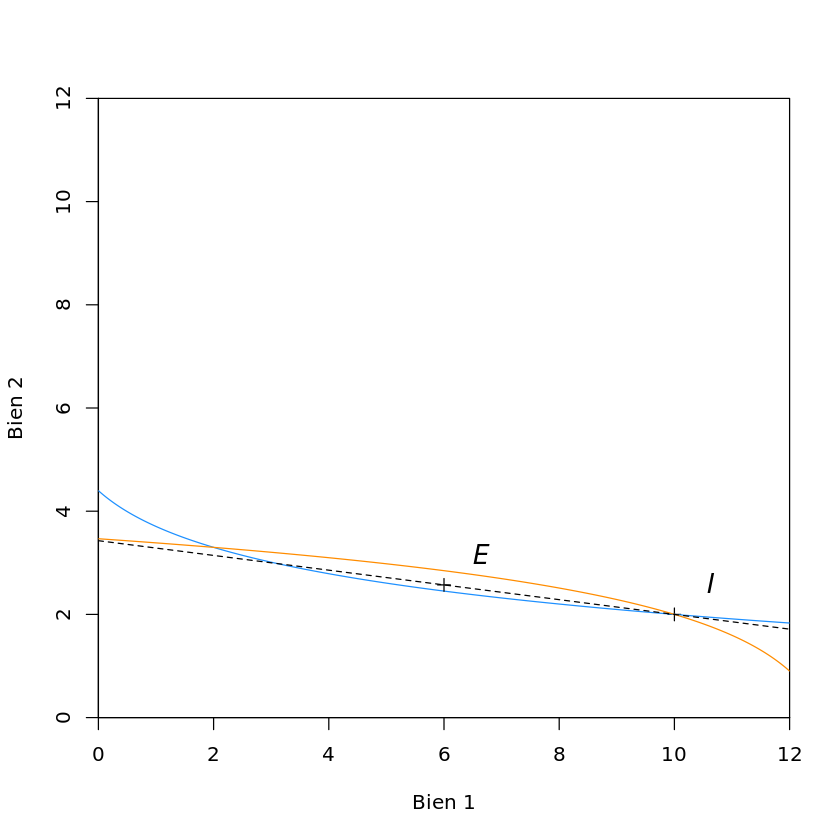

In [2]:
# Demandes (solutions internes) et prix d'équilibre

x1A <- function(p) p[2]/p[1] - 1
x2A <- function(p) (crossprod(p, ωA) - p[1]*x1A(p))/p[2]
x1B <- function(p) p[2]/p[1] - 1
x2B <- function(p) (crossprod(p, ωB) - p[1]*x1B(p))/p[2]
r <- 1/(1 + ω1/2)
p_eq <- c(r, 1)


# Allocation initiale et allocation d'équilibre

I <- ωA
E <- c(x1A(p_eq), x2A(p_eq))


# Graphe

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                    # allocation initiale I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2], 0)), col = "dodgerblue", ylim = c(0, ω2))     # courbe d'indifférence de A
lines(ω1 - x1, ω2 - indiffB(UB(ω1 - I[1], ω2 - I[2])), col = "darkorange", ylim = c(0, ω2)) # indiff. B
lines(x1, r*ωA[1] + ωA[2] - r*x1, lty = 2)                                     # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                      # équilibre concurrentiel E
    text(E[1]+.05*ω1, E[2]+.05*ω2, labels = "E", cex = 1.3, font = 3)

#### Question 4.

Maintenant, cherchons les optima de Pareto internes. Pour cela, on résout par exemple

\begin{equation}
    \max_{x^A, x^B} \; U^A(x^A, x_1^B) \qquad
        \text{s.c.} \; \begin{cases}
        U^B(x^B) \geq \underline U^B \\
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_k^i > 0 \; (\forall k \in \{1, 2\}, i \in \{A, B\}).
        \end{cases}
\end{equation}

En ignorant _a priori_ les contraintes de positivité des allocations, le lagrangien associé à ce problème s'écrit

\begin{equation}
    \mathcal L (x^A, x^B, \lambda, \mu_1, \mu_2) = \ln(1 + x_1^A) + x_2^A - \frac{\ln(1 + x_1^B)}{2} + \lambda \big( \ln(1 + x_1^B) + x_2^B - \underline U^B \big) + \mu_1 (\omega_1 - x_1^A - x_1^B) + \mu_2 (\omega_2 - x_2^A - x_2^B)
\end{equation}

et les conditions du premier ordre sont

\begin{aligned}
    &\frac{1}{1 + x_1^A} - \mu_1 = 0 \\
    &1 - \mu_2 = 0 \\
    &- \frac{1}{2(1 + x_1^B)} + \lambda \frac{1}{1 + x_1^B} - \mu_1 = 0 \\
    &\lambda - \mu_2 = 0 \\
    &U^B(x^B) = \underline U^B \\
    &x_1^A + x_1^B = \omega_1 \\
    &x_2^A + x_2^B = \omega_2.
\end{aligned}

Une combinaison adéquate de ces équations fournit

\begin{equation}
    \underbrace{
        \underbrace{\frac{1}{1 + x_1^A}}_{= \mathsf{TMS}^A}
    }_\text{valeur sociale du bien 1 consommé par $A$}
    = \frac{\mu_1}{\mu_2}
    = \underbrace{
    \underbrace{- \frac{1}{2(1 + x_1^B)}}_{\text{dommage marginal}}
    + \underbrace{\frac{1}{1 + x_1^B}}_{= \mathsf{TMS}^B}
    }_\text{valeur sociale du bien 1 consommé par $B$}.
\end{equation}

À cause de l'externalité, l'égalité des TMS des agents n'est plus vérifiée à l'optimum : ce sont désormais les *valeurs sociales* des consommations (valeur privée, i.e. TMS, plus dommage ou bénéfice marginal) qui sont égales.

On résout cette équation en utilisant $x_1^B = \omega_1 - x_1^A$ et on obtient finalement

\begin{equation}
    \boxed{ x_1^A = \frac{1 + 2\omega_1}{3} } \overset{\text{A.N.}}{=} 8 + \frac{1}{3}
    \quad \text{et} \quad 
    \boxed{ x_1^B = \frac{\omega_1 - 1}{3} } \overset{\text{A.N.}}{=} 4 - \frac{1}{3}.
\end{equation}

Les allocations optimales sont donc à un niveau fixe d'allocation en bien 1, tandis que les allocations en bien 2 doivent juste vérifier $x_2^A + x_2^B = \omega_2$. Cela correspond à un segment vertical dans la boîte d'Edgeworth.


*Représentons la courbe des optima ci-dessous dans la boîte d'Edgeworth (en violet). Les optima en coin y figurent aussi (voir TD1 exercice 2).*

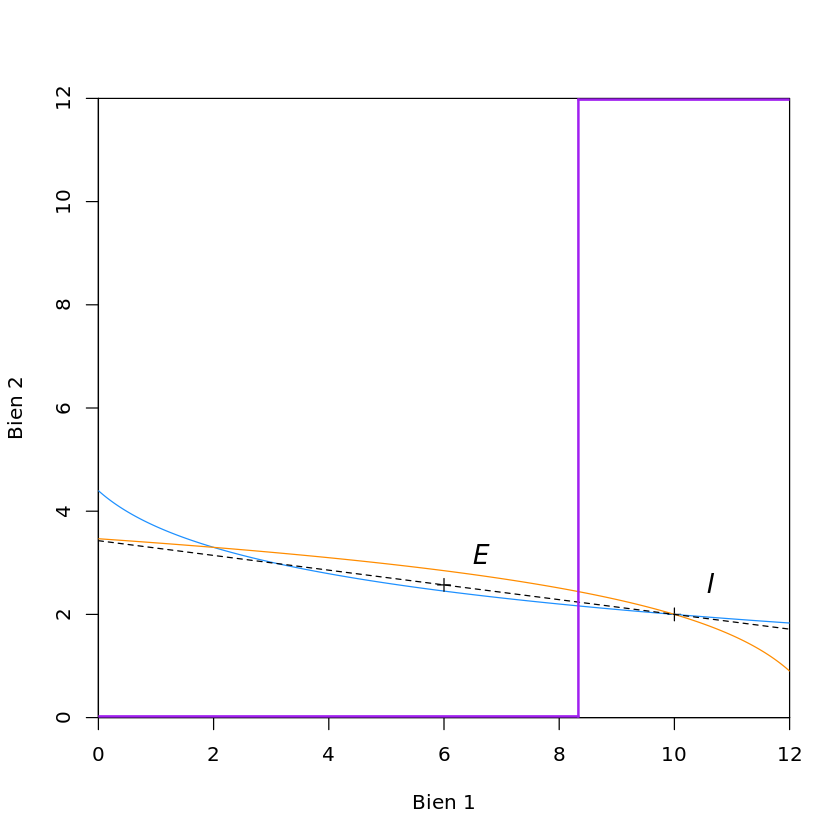

In [3]:
plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                    # allocation initiale I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2], 0)), col = "dodgerblue", ylim = c(0, ω1))     # courbe d'indifférence de A
lines(ω1 - x1, ω2 - indiffB(UB(ω1 - I[1], ω2 - I[2])), col = "darkorange", ylim = c(0, ω2)) # indiff. B
lines(x1, r*ωA[1] + ωA[2] - r*x1, lty = 2)                                     # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                      # équilibre concurrentiel E
    text(E[1]+.05*ω1, E[2]+.05*ω2, labels = "E", cex = 1.3, font = 3)
lines(c((1+2*ω1)/3, (1+2*ω1)/3), c(0, ω2), lwd = 2, col = "purple")            # optima internes
lines(c(0, (1+2*ω1)/3), c(0, 0)+.002*ω2, lwd = 2, col = "purple")              # optima en coin : xA2 = 0
lines(c((1+2*ω1)/3, ω1), c(ω2, ω2)-.002*ω2, lwd = 2, col = "purple")           # optima en coin : xB2 = 0

#### Question 5.

La valeur sociale du bien 1 à l'optimum de Pareto est

\begin{equation}
    \mathsf{TMS}^A \left(x_1^A = \frac{1 + 2\omega_1}{3} \right) \overset{\text{A.N.}}{=} \frac{3}{28}.
\end{equation}

#### Question 6.

On voit bien que l'équilibre n'est pas un optimum de Pareto : le premier théorème du bien-être n'est pas vérifié en raison des externalités. En effet, à l'équilibre concurrentiel on doit avoir $\mathsf{TMS}^A = \mathsf{TMS}^B \,( = \frac{p_1}{p_2})$ alors qu'à l'optimum de Pareto

\begin{equation}
    \mathsf{TMS}^A = \mathsf{TMS}^B + \underbrace{\text{dommage marginal}}_{< 0} < \mathsf{TMS}^B.
\end{equation}

À l'équilibre les agents ne prennent pas en compte que la consommation en bien 1 de $B$ a un effet social néfaste : $B$ consomme donc trop de bien 1 par rapport à l'optimum.

#### Question 7.

On veut désormais utiliser le mécanisme de la *taxe pigovienne* pour faire coïncider l'équilibre avec un optimum de Pareto, $x^A = (\frac{25}{3}, 6)$ et $x^B = (\frac{11}{3}, 6)$. L'idée est de taxer la consommation en bien 1 de $B$ afin de l'inciter à en consommer moins.


#### Question 8.

La taxe est unitaire, c'est-à-dire que $B$ devra payer un montant $t^B$ pour chaque unité de bien 1 consommée. La montant total de sa taxe sera donc $t^B x_1^B$.

Afin d'implémenter l'optimum $x_1^B = \frac{\omega_1 - 1}{3}$ et en normalisant $p_2 = 1$ (c'est-à-dire en considérant que le bien 2 est le numéraire), la valeur de la taxe doit alors être 

\begin{equation}
    t^B = -\text{ dommage marginal} \left( x_1^B = \frac{\omega_1 - 1}{3} \right)
    = \frac{1}{1 + \frac{\omega_1 - 1}{3}}
    \overset{\text{A.N.}}{=} \frac{3}{28}.
\end{equation}

Les prix payés par chaque agent sont alors

\begin{equation}
    p_1^A = \mathsf{TMS}^A \left( x_1^A = \frac{1 + 2\omega_1}{3} \right)
    = \frac{1}{1 + \frac{1 + 2\omega_1}{3}}
    \overset{\text{A.N.}}{=} \frac{3}{28}
\end{equation}
et 
\begin{equation}
    p_1^B = p_1^A + t^B
    \overset{\text{A.N.}}{=} \frac{6}{28}.
\end{equation}

De cette façon, à l'équilibre on a bien 

\begin{equation}
    \mathsf{TMS}^A = p_1^A = p_1^B - t^B = \mathsf{TMS}^B + \underbrace{\text{dommage marginal}}_{<0}
\end{equation}

c'est-à-dire l'égalité des valeurs sociales de la consommation en bien 1.

#### Question 9.

En réinjectant les prix personnalisés $p_1^A$ et $p_1^B$ dans les demandes des agents, on trouve qu'à l'équilibre avec taxe $x_1^A = 8 + \frac{1}{3}$ et $x_1^B = 4 - \frac{1}{3}$, ce qui correspond bien aux allocations optimales en bien 1.

En revanche, l'allocation d'équilibre avec taxe $(x^A, x^B)$ n'utilise pas toutes les ressources disponibles en bien 2 : $x_2^A + x_2^B < \omega_2$. C'est parce qu'une partie a été prélevée via taxation. Il faut imaginer que **les deux agents font d'abord un échange au prix en vigueur sur le marché, $p_1^A$, ce qui les amène tous les deux à l'allocation optimale $(x^A, \omega - x^A)$. Puis, après l'échange, la taxe prélève la richesse $t^B x_1^B$ à $B$ (en bien 2), ce qui l'amène à $x^B$** (mais $A$ qui n'est pas taxé reste à $x^A$). L'agent $B$ réalise l'échange en anticipant qu'il sera plus tard taxé sur son bien 1, et c'est cette anticipation qui l'incite à consommer moins de bien 1 qu'à l'échange concurrentiel sans taxe vu plus haut.

Précisément, en se rappellant que $p_2 = 1$, le calcul donne 

\begin{align}
    x_2^A &= p_1^A \omega_1^A + \omega_2^A - p_1^A x_1^A \overset{\text{A.N.}}{=} 2 + \frac{5}{28} < 6 \\
    x_2^B &= \color{blue}{p_1^A} \omega_1^B + \omega_2^B - \color{orange}{p_1^B} x_1^B \overset{\text{A.N.}}{=} 9 + \frac{12}{28} > 6
\end{align}

ce qui ne correspond pas à l'allocation optimale visée.

La somme vaut $x_2^A + x_2^B = 11 + \frac{17}{28}$, c'est-à-dire une différence de $\frac{11}{28}$ avec la dotation totale $\omega_2 = 12$.

Or on peut aussi vérifier que $t^B x_1^B = \frac{11}{28}$ : le manque correspond bien à ce qui a été prélevé par taxe.


*Représentons cela dans la boîte d'Edgeworth.*

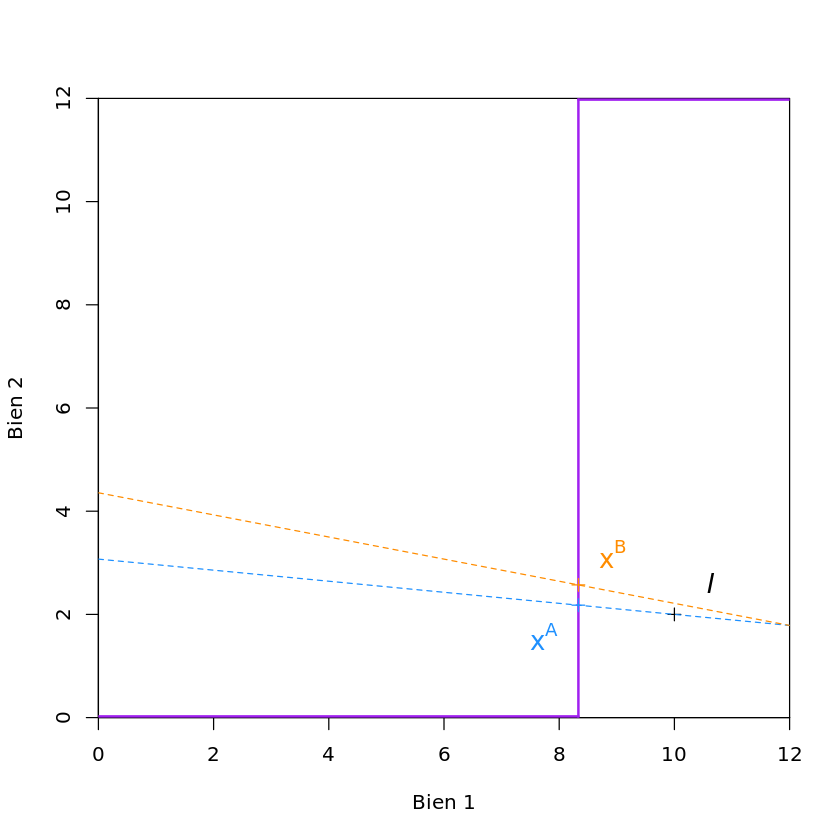

In [4]:
# Allocation optimale en bien 1 et prix d'équilibre

x1A <- (1 + 2*ω1)/3
x1B <- ω1 - x1A
p1A <- 1/(1+x1A)
tB <- 1/(2*(1+x1B))
p1B <- p1A + tB


# Boîte d'Edgeworth, allocation initiale I, courbe des optima

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # allocation initiale I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(c((1+2*ω1)/3, (1+2*ω1)/3), c(0, ω2), lwd = 2, col = "purple")          # optima internes
lines(c(0, (1+2*ω1)/3), c(0, 0)+.002*ω2, lwd = 2, col = "purple")            # optima en coin : xA2 = 0
lines(c((1+2*ω1)/3, ω1), c(ω2, ω2)-.002*ω2, lwd = 2, col = "purple")         # optima en coin : xB2 = 0


# Droites de budget d'équilibre

lines(x1, p1A*ωA[1] + ωA[2] - p1A*x1, lty = 2, col = "dodgerblue")           # budget d'équilibre de A
lines(x1, ωA[2] + p1B*(ω1 - x1) - p1A*ωB[1], lty = 2, col = "darkorange")    # budget d'équilibre de B


# Allocations d'équilibre en bien 2

x2A <- p1A*(ωA[1] - x1A) + ωA[2]
x2B <- p1A*(ωB[1] - x1B) + ωB[2] - tB*x1B
xA <- c(x1A, x2A)
xB <- c(ω1 - x1B, ω2 - x2B)
points(xA[1], xA[2], pch = 3, col = "dodgerblue")                            # allocation finale de A
    text(xA[1]-.05*ω1, xA[2]-.05*ω2, labels = parse(text='x^A'), cex = 1.3, col = "dodgerblue")
points(xB[1], xB[2], pch = 3, col = "darkorange")                            # allocation finale de B
    text(xB[1]+.05*ω1, xB[2]+.05*ω2, labels = parse(text='x^B'), cex = 1.3, col = "darkorange")

Ci-dessus j'ai représenté la droite de budget d'équilibre de $A$ en bleu, et celle de $B$ en orange. Deux remarques :

- La droite de budget d'équilibre de $B$ ne passe pas par l'allocation initiale $I$. C'est parce qu'à $I$ l'agent $B$ est taxé sur son bien 1, donc sa richesse post-taxe est moindre que son budget initial (i.e. son allocation initiale évaluée aux prix du marché).

- Les droites de budget d'équilibre de $A$ et $B$ se croisent à $x_1^B = 0$. C'est parce qu'à ce point $B$ ne paie pas de taxe (puisqu'il n'a pas de bien 1) donc son budget n'est pas impacté.


#### Question 10.

Pour atteindre l'allocation optimale visée, où $x_2^A = x_2^B = 6$, il faut des transferts $T^A$ et $T^B$ tels que

\begin{align}
    x_2^A + T^A &= 6 \\
    x_2^B + T^B &= 6.
\end{align}

Il faut donc

\begin{equation}
     T^A = 4 - \frac{5}{28},
     \qquad
     T^B = - 3 - \frac{12}{28}.
\end{equation}

Dans ce cas, le transfert net versé par le régulateur est $T^A + T^B = \frac{11}{28}$. Comme le montant que celui-ci perçoit via la taxe pigovienne est aussi $t^B x_1^B = \frac{11}{28}$, son budget est équilibré. 


#### Question 11.

Pour résumer : la taxe pigovienne $t^B$ est mise en place sur la consommation de $B$ en bien 1. Celle-ci incite $B$ à consommer moins de bien 1 qu'il ne le ferait à un équilibre concurrentiel sans taxe. Nous avons pu ajuster le montant de cette taxe de telle sorte que la consommation en bien 1 de $B$ soit socialement optimale à l'équilibre sous taxe.

Ce faisant, le régulateur prélève une quantité de bien 2 (le numéraire) via la taxe. L'allocation atteinte par les deux agents n'est donc pas un optimum de Pareto puisqu'elle n'utilise pas toutes les ressources disponibles en bien 2.

La recette de la taxe peut alors être réinjectée dans l'économie par le régulateur afin de garantir que l'équilibre atteint est bien un optimum. Couplé à des transferts forfaitaires, nous pouvons atteindre l'allocation optimale voulue. 
